# Final Capstone Project

The notebook aims to implement the skills and tools to use location data to explore a geographical location and have the opportunity to be creative and come up with an idea to leverage the Foursquare location data to explore or compare neighborhoods or cities or to come up with a problem that uses the Foursquare location data to solve. 



The main goal of this project is to perform segmentation and clustering of the most popular city of India, by analyzing its most popular venues and places

# Analyzing Mumbai City

# Webscrape Mumbai Area Codes

In [46]:
import html
import html5lib
import lxml
from bs4 import BeautifulSoup


In [47]:
import requests

In [48]:

#scrapping neighborhoods in Mumbai
url  = "https://www.mapsofindia.com/pincode/india/maharashtra/mumbai/"
page = requests.get(url)


In [52]:
df_html = pd.read_html(url, na_values = ['Not assigned'])[0]
df_html.head()

,Pincode Details,Pincode Details.1,Pincode Details.2,Pincode Details.3
0,Location,Pincode,State,District
1,A I staff colony,400029,Maharashtra,Mumbai
2,Aareymilk Colony,400065,Maharashtra,Mumbai
3,Agripada,400011,Maharashtra,Mumbai
4,Airport,400099,Maharashtra,Mumbai


Clean the dataframe

In [55]:
df_html.columns = df_html.iloc[0]
df_html = df_html[1:]

In [56]:
df_html.head()

,Location,Pincode,State,District
1,A I staff colony,400029,Maharashtra,Mumbai
2,Aareymilk Colony,400065,Maharashtra,Mumbai
3,Agripada,400011,Maharashtra,Mumbai
4,Airport,400099,Maharashtra,Mumbai
5,Ambewadi,400004,Maharashtra,Mumbai


May require only Location and Pincode for the project

Data Cleaning:Check NA Values

In [58]:
df_html[df_html['Pincode'].isna()]

,Location,Pincode,State,District


In [59]:
df_html[df_html['Location'].isna()]

,Location,Pincode,State,District


We can confirm that all locations and pincodes are available without any missing values

In [60]:
print('The shape of the dataset is:',df_html.shape)

The shape of the dataset is: (182, 4)


### Getting Cordinates for each location and Mumbai City

In [61]:
import numpy as np 

import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json 
from geopy.geocoders import Nominatim 

import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans
import folium 

In [66]:
import geocoder

In [70]:
def get_latlng(neighborhood):
    
    lat_lng_coords = None
    while(lat_lng_coords is None):
        g = geocoder.google('{}, Mumabi, India'.format(neighborhood))
        lat_lng_coords = g.latlng
    return lat_lng_coords

In [73]:
coords = [ get_latlng(neighborhood) for neighborhood in df_html["Location"].tolist() ]


Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)
Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)
Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)
Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)
Status code Unknown from https://geocode.arcgis.com/arcgis/rest/services/World/GeocodeServer/find: ERROR - HTTPSConnectionPool(host='geocode.arcgis.com', port=443): Read timed out. (read timeout=5.0)


In [74]:
df_coords = pd.DataFrame(coords, columns=['Latitude', 'Longitude'])

# merge the coordinates into the original dataframe
df_html['Latitude'] = df_coords['Latitude']
df_html['Longitude'] = df_coords['Longitude']

In [77]:
df_html.head(200)

,Location,Pincode,State,District,Latitude,Longitude
1,A I staff colony,400029,Maharashtra,Mumbai,19.166115,72.859403
2,Aareymilk Colony,400065,Maharashtra,Mumbai,18.976280,72.826150
3,Agripada,400011,Maharashtra,Mumbai,19.094130,72.855810
4,Airport,400099,Maharashtra,Mumbai,19.120590,72.925240
5,Ambewadi,400004,Maharashtra,Mumbai,19.119770,72.846290
6,Andheri,400053,Maharashtra,Mumbai,19.109230,72.881040
7,Andheri East,400069,Maharashtra,Mumbai,19.118600,72.847550
8,Andheri Railway station,400058,Maharashtra,Mumbai,19.026140,72.866450
9,Antop Hill,400037,Maharashtra,Mumbai,13.037910,80.234200
10,Asvini,400005,Maharashtra,Mumbai,19.170320,72.958430


In [76]:
df_html[df_html['Latitude'].isna()]

,Location,Pincode,State,District,Latitude,Longitude
182,Worli Sea face,400030,Maharashtra,Mumbai,NaN,NaN


Replace NaN with correct cordinates

In [78]:
df_html['Latitude'].replace(np.NaN, "19.012390", inplace=True)
df_html['Longitude'].replace(np.NaN, "72.816840", inplace=True)

Save data to csv

In [79]:
df_html[df_html['Latitude'].isna()]

,Location,Pincode,State,District,Latitude,Longitude


In [87]:
df_html.to_csv("cordinates.csv", index=False)

In [195]:
coords = pd.read_csv("/Users/rhearepe/Desktop/cordinates.csv")


In [196]:
coords.head()

,Location,Pincode,State,District,Latitude,Longitude
0,A I staff colony,400029,Maharashtra,Mumbai,19.166115,72.859403
1,Aareymilk Colony,400065,Maharashtra,Mumbai,18.976280,72.826150
2,Agripada,400011,Maharashtra,Mumbai,19.094130,72.855810
3,Airport,400099,Maharashtra,Mumbai,19.120590,72.925240
4,Ambewadi,400004,Maharashtra,Mumbai,19.119770,72.846290


In [197]:
city = "Mumbai"
country = "India"

In [198]:
address = city
geolocator = Nominatim(user_agent='most_visited')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude


print('The cordinates of Mumbai are:')   
print('\n latitude: ', latitude)
print('longitude: ', longitude)

The cordinates of Mumbai are:

 latitude:  18.9387711
longitude:  72.8353355


In [199]:
cities = pd.DataFrame()
cities['Latitude'] = pd.Series(latitude)
cities['Longitude'] = pd.Series(longitude)
cities['City'] = pd.Series(city)
cities['Country'] = pd.Series(country)
cities.head()

,Latitude,Longitude,City,Country
0,18.938771,72.835335,Mumbai,India


In [200]:
# Create map of the world
world_map = folium.Map(location=[0, 0], zoom_start=1)

# Add cities as markers
for lat, lng, country, city in zip(cities['Latitude'],
                                   cities['Longitude'],
                                   cities['Country'],
                                   cities['City']):
    label = '{}, {}'.format(city, country)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#ff6464',
        fill_opacity=0.7,
        parse_html=False).add_to(world_map)  
    
world_map

In [201]:
CLIENT_ID = 'RJK5JAH1RCGF42DA0KWAYTAQ5HD1CWNGE55OSSJ5FLLGV3FX' # Foursquare ID
CLIENT_SECRET = 'ZODG12IEPG2FDDJ31YYDEXZ0VKY3XXU2RRZ1JKRUC2I0COLI' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Credentials:')
print('CLIENT_ID: ' + CLIENT_ID + '...')
print('CLIENT_SECRET: ' + CLIENT_SECRET + '...')

Credentials:
CLIENT_ID: RJK5JAH1RCGF42DA0KWAYTAQ5HD1CWNGE55OSSJ5FLLGV3FX...
CLIENT_SECRET: ZODG12IEPG2FDDJ31YYDEXZ0VKY3XXU2RRZ1JKRUC2I0COLI...


In [202]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [203]:
radius = 2000
LIMIT = 100

venues = []

for lat, long, neighborhood in zip(coords['Latitude'], coords['Longitude'], coords['Location']):
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        long,
        radius, 
        LIMIT)
    
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            neighborhood,
            lat, 
            long, 
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name']))

In [204]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Location', 'Latitude', 'Longitude', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory']

print(venues_df.shape)
venues_df.head()

(14803, 7)


,Location,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
0,A I staff colony,19.166115,72.859403,The Westin Mumbai Garden City,19.172654,72.860518,Hotel
1,A I staff colony,19.166115,72.859403,PVR Cinemas,19.174016,72.860485,Multiplex
2,A I staff colony,19.166115,72.859403,The Fern - An Eco Hotel,19.162362,72.856972,Hotel
3,A I staff colony,19.166115,72.859403,Starbucks,19.174177,72.860350,Coffee Shop
4,A I staff colony,19.166115,72.859403,MadOverDonuts,19.173902,72.860185,Donut Shop


In [97]:
venues_df.groupby('VenueCategory').VenueName.count()

VenueCategory
Accessories Store                              3
Airport                                       17
Airport Food Court                             1
Airport Lounge                                 8
Airport Service                               10
Airport Terminal                               4
American Restaurant                           29
Antique Shop                                  14
Arcade                                        45
Art Gallery                                   22
Arts & Crafts Store                            1
Asian Restaurant                             194
Athletics & Sports                            41
Australian Restaurant                          3
Auto Dealership                                1
BBQ Joint                                    106
Bagel Shop                                     8
Bakery                                       392
Bar                                          406
Baseball Field                                 1
Beach 

### Venues in Each Location

In [205]:
venues_df.groupby(["Location"]).count()

,Latitude,Longitude,VenueName,VenueLatitude,VenueLongitude,VenueCategory
Location,,,,,,
A I staff colony,76,76,76,76,76,76
Aareymilk Colony,75,75,75,75,75,75
Agripada,100,100,100,100,100,100
Airport,100,100,100,100,100,100
Ambewadi,91,91,91,91,91,91
Andheri,100,100,100,100,100,100
Andheri East,100,100,100,100,100,100
Andheri Railway station,82,82,82,82,82,82
Antop Hill,100,100,100,100,100,100


### Venue Categories 

In [206]:
venues_df['VenueCategory'].unique()

array(['Hotel', 'Multiplex', 'Coffee Shop', 'Donut Shop', 'Brewery',
       'Hotel Bar', 'Vegetarian / Vegan Restaurant', 'Seafood Restaurant',
       'Shopping Mall', 'Breakfast Spot', 'Indian Restaurant',
       'Fast Food Restaurant', 'Snack Place', 'Bookstore', 'Bakery',
       'Bar', 'Sandwich Place', 'Asian Restaurant', 'Clothing Store',
       'Chinese Restaurant', 'Italian Restaurant', 'Electronics Store',
       'Bistro', 'Design Studio', 'Gym', 'Farm', 'Pizza Place',
       'Restaurant', 'Café', 'Gym / Fitness Center', 'Ice Cream Shop',
       'Smoke Shop', 'Diner', 'American Restaurant', 'Spa',
       'Train Station', 'Club House', 'Nightclub', 'History Museum',
       'Golf Course', 'Middle Eastern Restaurant', 'Scenic Lookout',
       'Music Venue', 'Bengali Restaurant', 'Deli / Bodega',
       'Cupcake Shop', 'Juice Bar', 'Dessert Shop', 'BBQ Joint',
       'Planetarium', 'Garden', 'Punjabi Restaurant',
       'Modern European Restaurant', 'Art Gallery', 'Theater',
      

In [207]:
print('There are {} unique categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 233 unique categories.


# Preprocessing venues data

In [208]:
# Applying OH Encoding by 'creating dummies'
venues_one_hot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# Add the 'Postal Code' column back to dataset
venues_one_hot['Location'] = venues_df['Location'] 

# Move postal code column to the first column
fixed_columns = [venues_one_hot.columns[-1]] + list(venues_one_hot.columns[:-1])
venues_one_hot = venues_one_hot[fixed_columns]

venues_one_hot.head()

,Location,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Big Box Store,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Cafeteria,Café,Camera Store,Campground,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Auditorium,College Gym,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Duty-free Shop,Electronics Store,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Goan Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,Hyderabadi Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Light Rail Station,Lighthouse,Liquor Store,Lounge,Maharashtrian Restaurant,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Other Great Outdoors,Outdoors & Recreation,Park,Parsi Restaurant,Performing Arts Venue,Pet Store,Pharmacy,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Pub,Punjabi Restaurant,Racetrack,Recording Studio,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Toll Booth,Toy / Game Store,Track,Trail,Train,Train Station,Tunnel,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,A I staff colony,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,A I staff colony,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [209]:
venues_grouped = venues_one_hot.groupby('Location').mean().reset_index()
venues_grouped

,Location,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Big Box Store,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Cafeteria,Café,Camera Store,Campground,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Auditorium,College Gym,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Duty-free Shop,Electronics Store,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Goan Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,Hyderabadi Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Light Rail Station,Lighthouse,Liquor Store,Lounge,Maharashtrian Restaurant,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Other Great Outdoors,Outdoors & Recreation,Park,Parsi Restaurant,Performing Arts Venue,Pet Store,Pharmacy,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Pub,Punjabi Restaurant,Racetrack,Recording Studio,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Toll Booth,Toy / Game Store,Track,Trail,Train,Train Station,Tunnel,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,A I staff colony,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013158,0.000000,0.000000,0.000000,0.000000,0.013158,0.000000,0.000000,0.000000,0.000000,0.00,0.026316,0.039474,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.013158,0.000000,0.026316,0.000000,0.000000,0.000000,0.013158,0.013158,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.026316,0.000000,0.000000,0.00,0.000000,0.013158,0.013158,0.000000,0.000000,0.039474,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.013158,0.000000,0.00,0.000000,0.013158,0.026316,0.000000,0.00,0.013158,0.00

In [210]:
num_top_venues = 5

for location in venues_grouped['Location']:
    print("------------ "+location+" ------------")
    temp = venues_grouped[venues_grouped['Location'] == location].T.reset_index()
    temp.columns = ['Venue Cat','Freq']
    temp = temp.iloc[1:]
    temp['Freq'] = temp['Freq'].astype(float)
    temp = temp.round({'Freq': 2})
    print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

------------ A I staff colony ------------
              Venue Cat  Freq
0     Indian Restaurant  0.13
1  Fast Food Restaurant  0.13
2        Sandwich Place  0.04
3           Coffee Shop  0.04
4                   Bar  0.04


------------ Aareymilk Colony ------------
           Venue Cat  Freq
0  Indian Restaurant  0.15
1         Restaurant  0.07
2             Bakery  0.07
3                Bar  0.04
4     Ice Cream Shop  0.04


------------ Agripada ------------
           Venue Cat  Freq
0  Indian Restaurant  0.14
1               Café  0.08
2        Coffee Shop  0.07
3              Hotel  0.07
4     Sandwich Place  0.05


------------ Airport ------------
            Venue Cat  Freq
0   Indian Restaurant  0.14
1                Café  0.07
2  Chinese Restaurant  0.04
3          Restaurant  0.04
4    Department Store  0.04


------------ Ambewadi ------------
           Venue Cat  Freq
0  Indian Restaurant  0.20
1                Pub  0.05
2        Pizza Place  0.05
3        Snack Place  

4          Diner  0.12


------------ J.B. nagar ------------
              Venue Cat  Freq
0     Indian Restaurant  0.22
1  Fast Food Restaurant  0.06
2                Bakery  0.05
3           Coffee Shop  0.05
4        Ice Cream Shop  0.04


------------ J.J.hospital ------------
            Venue Cat  Freq
0   Indian Restaurant  0.10
1         Coffee Shop  0.05
2          Restaurant  0.05
3  Italian Restaurant  0.04
4                Café  0.04


------------ Jacob Circle ------------
            Venue Cat  Freq
0   Indian Restaurant  0.19
1      Ice Cream Shop  0.11
2  Chinese Restaurant  0.08
3      Sandwich Place  0.05
4    Asian Restaurant  0.05


------------ Jogeshwari East ------------
              Venue Cat  Freq
0     Indian Restaurant  0.09
1                  Café  0.07
2    Chinese Restaurant  0.06
3  Fast Food Restaurant  0.05
4                   Pub  0.05


------------ Jogeshwari West ------------
           Venue Cat  Freq
0  Indian Restaurant  0.10
1              Hot

            Venue Cat  Freq
0   Indian Restaurant  0.16
1  Chinese Restaurant  0.09
2      Ice Cream Shop  0.09
3        Dance Studio  0.05
4          Restaurant  0.05


------------ Ramwadi ------------
            Venue Cat  Freq
0   Indian Restaurant  0.16
1              Bakery  0.06
2                Café  0.06
3  Chinese Restaurant  0.06
4         Coffee Shop  0.05


------------ Ranade Road ------------
                       Venue Cat  Freq
0           Fast Food Restaurant  0.12
1              Indian Restaurant  0.09
2  Vegetarian / Vegan Restaurant  0.06
3                    Snack Place  0.06
4                            Bar  0.04


------------ Rani Sati marg ------------
           Venue Cat  Freq
0  Indian Restaurant  0.17
1        Pizza Place  0.09
2                Zoo  0.04
3             Bakery  0.04
4           Pharmacy  0.04


------------ Reay Road ------------
              Venue Cat  Freq
0     Indian Restaurant  0.16
1  Fast Food Restaurant  0.08
2           Pizza Pla

In [211]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [212]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']
    
columns = ['Location']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# Create the new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Location'] = venues_grouped['Location']

for ind in np.arange(venues_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(venues_grouped.iloc[ind, :], num_top_venues)



# Top 10 Venues in each Location

In [213]:
venues_sorted.head()

,Location,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,A I staff colony,Indian Restaurant,Fast Food Restaurant,Coffee Shop,Gym / Fitness Center,Vegetarian / Vegan Restaurant,Multiplex,Pizza Place,Sandwich Place,Bar,Bakery
1,Aareymilk Colony,Indian Restaurant,Restaurant,Bakery,Ice Cream Shop,Coffee Shop,Bar,Dessert Shop,Café,Art Gallery,Fast Food Restaurant
2,Agripada,Indian Restaurant,Café,Coffee Shop,Hotel,Sandwich Place,Chinese Restaurant,Fast Food Restaurant,Seafood Restaurant,Food Truck,Tea Room
3,Airport,Indian Restaurant,Café,Chinese Restaurant,Restaurant,Department Store,Lounge,Dessert Shop,Ice Cream Shop,Bar,Shopping Mall
4,Ambewadi,Indian Restaurant,Pub,Pizza Place,Ice Cream Shop,Bar,Chinese Restaurant,Snack Place,Fast Food Restaurant,Café,Seafood Restaurant


# Clustering

In [214]:
from sklearn.cluster import KMeans

import matplotlib.cm as cm
import matplotlib.colors as colors

from yellowbrick.cluster import KElbowVisualizer

In [215]:
venues_clustering = venues_grouped.drop('Location', 1)
venues_clustering.head()

,Accessories Store,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Bengali Restaurant,Big Box Store,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Buffet,Building,Burger Joint,Burrito Place,Bus Station,Cafeteria,Café,Camera Store,Campground,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Auditorium,College Gym,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cricket Ground,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Design Studio,Dessert Shop,Dhaba,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Duty-free Shop,Electronics Store,Event Space,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gastropub,General College & University,General Entertainment,German Restaurant,Gift Shop,Gluten-free Restaurant,Goan Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Harbor / Marina,Historic Site,History Museum,Hockey Arena,Hookah Bar,Hostel,Hotel,Hotel Bar,Hotel Pool,Hyderabadi Restaurant,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Irani Cafe,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kids Store,Korean Restaurant,Lake,Light Rail Station,Lighthouse,Liquor Store,Lounge,Maharashtrian Restaurant,Malay Restaurant,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Mountain,Movie Theater,Mughlai Restaurant,Multicuisine Indian Restaurant,Multiplex,Music Store,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,North Indian Restaurant,Office,Opera House,Other Great Outdoors,Outdoors & Recreation,Park,Parsi Restaurant,Performing Arts Venue,Pet Store,Pharmacy,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Pool,Pool Hall,Pub,Punjabi Restaurant,Racetrack,Recording Studio,Recreation Center,Residential Building (Apartment / Condo),Resort,Restaurant,Road,Roof Deck,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Science Museum,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Soccer Field,South American Restaurant,South Indian Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Theme Park,Toll Booth,Toy / Game Store,Track,Trail,Train,Train Station,Tunnel,Vegetarian / Vegan Restaurant,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,0.0,0.00,0.0,0.00,0.00,0.0,0.013158,0.000000,0.00,0.000000,0.0,0.013158,0.000000,0.0,0.0,0.000000,0.0,0.026316,0.039474,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.013158,0.0,0.026316,0.0,0.000000,0.0,0.013158,0.013158,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.026316,0.0,0.0,0.0,0.0,0.013158,0.013158,0.000000,0.000000,0.039474,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.000000,0.00,0.000000,0.000000,0.013158,0.000000,0.00,0.0,0.013158,0.026316,0.0,0.0,0.013158,0.0,0.000000,0.013158,0.000000,0.131579,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.00,0.026316,0.039474,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,

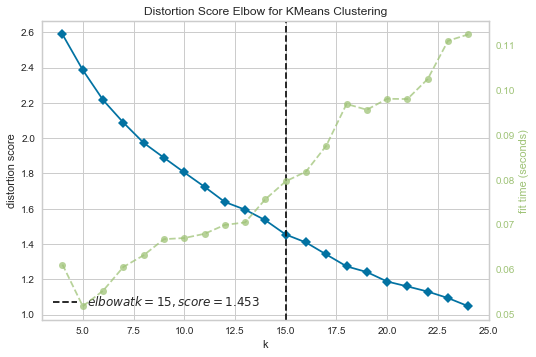

In [216]:
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(4,25))

visualizer.fit(venues_clustering)
visualizer.poof()

In [229]:
# Best K parameter
k_clusters = 15

# Run K-Means clustering algorithm
model = KMeans(n_clusters=k_clusters, random_state=0).fit(venues_clustering)

# Check cluster labels generated for each row in the dataframe
model.labels_[0:]

array([ 9,  0, 12,  7, 12, 10, 12,  4,  7,  9,  6,  9,  1,  5,  7,  8,  7,
       12,  0,  7,  7,  1,  1,  1, 11,  5,  7,  6,  2,  8,  6,  7,  6,  7,
        5,  5, 14,  0,  0,  4, 11,  1,  1,  1,  7,  4,  4,  6,  6,  6,  0,
        9,  9,  9,  9,  7,  0,  6,  8,  7,  7,  5, 12,  9,  4,  7, 12, 10,
        3,  6,  7,  4,  7, 12,  7,  6,  6,  1,  8,  4,  4,  0,  7,  8,  7,
        4,  4,  7,  8, 12,  4, 13,  9,  1,  4,  4,  4,  0,  8,  8,  8,  1,
        6,  5,  5, 10, 10, 14,  4,  6,  6,  6,  4,  8,  0,  5,  4, 12,  8,
        4,  5,  7,  1,  6,  6,  0,  8,  7,  7, 14,  7,  7,  6,  0,  1,  1,
        4,  9,  0,  9,  9,  7,  1,  7, 10,  5, 10,  5,  5,  9, 10, 14,  1,
        4,  8,  5,  9, 14,  0,  6,  5,  6,  0,  9,  7,  6,  5,  4,  8, 12,
       12, 12,  4,  4,  7,  7,  7,  7,  7,  7], dtype=int32)

In [230]:
venues_sorted.insert(0, 'Cluster Labels', model.labels_)

ValueError: cannot insert Cluster Labels, already exists

In [231]:
venues_merged = df_html.join(venues_sorted.set_index('Location'), on='Location')

In [232]:
venues_merged.head()


,Location,Pincode,State,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,A I staff colony,400029,Maharashtra,Mumbai,19.1661,72.8594,9.0,Indian Restaurant,Fast Food Restaurant,Coffee Shop,Gym / Fitness Center,Vegetarian / Vegan Restaurant,Multiplex,Pizza Place,Sandwich Place,Bar,Bakery
2,Aareymilk Colony,400065,Maharashtra,Mumbai,18.9763,72.8262,0.0,Indian Restaurant,Restaurant,Bakery,Ice Cream Shop,Coffee Shop,Bar,Dessert Shop,Café,Art Gallery,Fast Food Restaurant
3,Agripada,400011,Maharashtra,Mumbai,19.0941,72.8558,12.0,Indian Restaurant,Café,Coffee Shop,Hotel,Sandwich Place,Chinese Restaurant,Fast Food Restaurant,Seafood Restaurant,Food Truck,Tea Room
4,Airport,400099,Maharashtra,Mumbai,19.1206,72.9252,7.0,Indian Restaurant,Café,Chinese Restaurant,Restaurant,Department Store,Lounge,Dessert Shop,Ice Cream Shop,Bar,Shopping Mall
5,Ambewadi,400004,Maharashtra,Mumbai,19.1198,72.8463,12.0,Indian Restaurant,Pub,Pizza Place,Ice Cream Shop,Bar,Chinese Restaurant,Snack Place,Fast Food Restaurant,Café,Seafood Restaurant


In [233]:
venues_merged = venues_merged.dropna()

In [234]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i+x+(i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(venues_merged['Latitude'], venues_merged['Longitude'], venues_merged['Location'], venues_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [235]:
venues_merged.loc[venues_merged['Cluster Labels'] == 0, venues_merged.columns[[0] + list(range(6, venues_merged.shape[1]))]]

,Location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Aareymilk Colony,0.0,Indian Restaurant,Restaurant,Bakery,Ice Cream Shop,Coffee Shop,Bar,Dessert Shop,Café,Art Gallery,Fast Food Restaurant
19,Best Staff colony,0.0,Indian Restaurant,Restaurant,Fast Food Restaurant,Bakery,Dessert Shop,Ice Cream Shop,Chinese Restaurant,Pizza Place,Juice Bar,Italian Restaurant
38,Cotton Exchange,0.0,Indian Restaurant,Bakery,Bar,Fast Food Restaurant,Restaurant,Café,Chinese Restaurant,Theater,Lounge,Park
39,Cumballa Hill,0.0,Indian Restaurant,Restaurant,Dessert Shop,Coffee Shop,Ice Cream Shop,Bakery,Fast Food Restaurant,Snack Place,Juice Bar,Pizza Place
52,Falkland Road,0.0,Indian Restaurant,Restaurant,Fast Food Restaurant,Ice Cream Shop,Dessert Shop,Bakery,Pizza Place,Juice Bar,Chinese Restaurant,Snack Place
58,Government Colony,0.0,Indian Restaurant,Bakery,Restaurant,Fast Food Restaurant,Juice Bar,Bar,Coffee Shop,Ice Cream Shop,Italian Restaurant,Dessert Shop
83,Ketkipada,0.0,Indian Restaurant,Restaurant,Ice Cream Shop,Fast Food Restaurant,Bakery,Pizza Place,Coffee Shop,Bar,Café,Snack Place
99,Mahim East,0.0,Indian Restaurant,Dessert Shop,Café,Coffee Shop,Fast Food Restaurant,Bakery,Ice Cream Shop,Italian Restaurant,Snack Place,Pizza Place
116,Motilal Nagar,0.0,Indian Restaurant,Restaurant,Bakery,Fast Food Restaurant,Ice Cream Shop,Italian Restaurant,Pizza Place,Bar,Dessert Shop,Coffee Shop
127,Null Bazar,0.0,Indian Restaurant,Restaurant,Fast Food Restaurant,Dessert Shop,Ice Cream Shop,Bakery,Chinese Restaurant,Juice Bar,Snack Place,Pizza Place


In [176]:
venues_merged.loc[venues_merged['Cluster Labels'] == 1, venues_merged.columns[[0] + list(range(6, venues_merged.shape[1]))]]

,Location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,B.N. bhavan,1.0,Indian Restaurant,Fast Food Restaurant,Restaurant,Chinese Restaurant,Pizza Place,Café,Diner,BBQ Joint,Bar,Hotel Bar
22,Bhawani Shankar rd,1.0,Indian Restaurant,Café,Restaurant,Ice Cream Shop,Fast Food Restaurant,Chinese Restaurant,Sandwich Place,Lounge,Diner,Snack Place
23,Borivali,1.0,Indian Restaurant,Café,Ice Cream Shop,Chinese Restaurant,Lounge,Park,Sandwich Place,Diner,Pizza Place,Restaurant
24,Borivali East,1.0,Indian Restaurant,Café,Ice Cream Shop,Restaurant,Chinese Restaurant,Gym,Sandwich Place,Fast Food Restaurant,Train Station,Clothing Store
42,Dadar Colony,1.0,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Ice Cream Shop,Restaurant,Gym,Bar,Food Truck,BBQ Joint,Lounge
43,Dahisar,1.0,Indian Restaurant,Chinese Restaurant,Fast Food Restaurant,Ice Cream Shop,Restaurant,Gym,Bar,Food Truck,BBQ Joint,Lounge
45,Danda,1.0,Indian Restaurant,Café,Chinese Restaurant,Ice Cream Shop,Restaurant,Diner,Snack Place,Fast Food Restaurant,Clothing Store,Pizza Place
79,Kamathipura,1.0,Indian Restaurant,Pizza Place,Café,Ice Cream Shop,Fast Food Restaurant,Coffee Shop,Lounge,Shopping Mall,Snack Place,Department Store
95,Madhavbaug,1.0,Indian Restaurant,Fast Food Restaurant,Café,Sandwich Place,Pizza Place,Ice Cream Shop,Lounge,Clothing Store,Chinese Restaurant,Restaurant
103,Malad West dely,1.0,Café,Indian Restaurant,Restaurant,Ice Cream Shop,Chinese Restaurant,Sandwich Place,Fast Food Restaurant,Gym,Train Station,Diner


In [177]:
venues_merged.loc[venues_merged['Cluster Labels'] == 2, venues_merged.columns[[0] + list(range(6, venues_merged.shape[1]))]]

,Location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Chakala Midc,2.0,Train Station,Bakery,Zoo,Donut Shop,Flea Market,Fish Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Farm


In [178]:
venues_merged.loc[venues_merged['Cluster Labels'] == 3, venues_merged.columns[[0] + list(range(6, venues_merged.shape[1]))]]

,Location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
68,Irla,3.0,Boat or Ferry,Pier,Dance Studio,Diner,Resort,Harbor / Marina,Fast Food Restaurant,Farmers Market,Farm,Dim Sum Restaurant


In [180]:
venues_merged.loc[venues_merged['Cluster Labels'] == 4, venues_merged.columns[[0] + list(range(6, venues_merged.shape[1]))]]

,Location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Andheri Railway station,4.0,Indian Restaurant,Snack Place,Café,Vegetarian / Vegan Restaurant,Fast Food Restaurant,Ice Cream Shop,Chinese Restaurant,Coffee Shop,Pizza Place,South Indian Restaurant
40,Cumballa Sea face,4.0,Indian Restaurant,Bakery,Coffee Shop,Chinese Restaurant,Movie Theater,Ice Cream Shop,Café,Fast Food Restaurant,Pizza Place,Snack Place
47,Delisle Road,4.0,Indian Restaurant,Café,Chinese Restaurant,Vegetarian / Vegan Restaurant,Pizza Place,Train Station,Bar,Bakery,Seafood Restaurant,Fast Food Restaurant
48,Dharavi,4.0,Indian Restaurant,Vegetarian / Vegan Restaurant,Pizza Place,Café,Bar,Fast Food Restaurant,Seafood Restaurant,Juice Bar,Coffee Shop,Train Station
66,High Court bulding,4.0,Indian Restaurant,Coffee Shop,Fast Food Restaurant,Café,Chinese Restaurant,Vegetarian / Vegan Restaurant,Donut Shop,Lounge,Restaurant,Pizza Place
73,Jacob Circle,4.0,Indian Restaurant,Ice Cream Shop,Chinese Restaurant,Asian Restaurant,Sandwich Place,Pet Store,Coffee Shop,Fast Food Restaurant,Restaurant,Lounge
81,Kandivali West,4.0,Indian Restaurant,Chinese Restaurant,Dessert Shop,Ice Cream Shop,Café,Italian Restaurant,Bar,Breakfast Spot,Snack Place,Restaurant
82,Kapad Bazar,4.0,Indian Restaurant,Chinese Restaurant,Motorcycle Shop,Food Truck,Movie Theater,Restaurant,Café,Bar,Diner,Fast Food Restaurant
87,Kherwadi,4.0,Indian Restaurant,Coffee Shop,Fast Food Restaurant,Café,Movie Theater,Snack Place,Vegetarian / Vegan Restaurant,Chinese Restaurant,Ice Cream Shop,Bar
88,Kidwai Nagar,4.0,Indian Restaurant,Vegetarian / Vegan Restaurant,Pizza Place,Bar,Café,Fast Food Restaurant,Train Station,Seafood Restaurant,Coffee Shop,Dessert Shop


In [179]:
venues_merged.loc[venues_merged['Cluster Labels'] == 5, venues_merged.columns[[0] + list(range(6, venues_merged.shape[1]))]]

,Location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
14,B.P.lane,5.0,Café,Coffee Shop,Indian Restaurant,Chinese Restaurant,Bar,Bakery,Pizza Place,Snack Place,Gourmet Shop,Scenic Lookout
26,C G s colony,5.0,Café,Indian Restaurant,Bar,Fast Food Restaurant,Chinese Restaurant,Bakery,Hotel,Restaurant,Cricket Ground,Coffee Shop
35,Chinchpokli,5.0,Indian Restaurant,Café,Hotel,Cricket Ground,Bar,Restaurant,Chinese Restaurant,Coffee Shop,Japanese Restaurant,Mediterranean Restaurant
36,Churchgate,5.0,Café,Indian Restaurant,Hotel,Bar,Japanese Restaurant,Coffee Shop,Restaurant,Theater,Mediterranean Restaurant,Asian Restaurant
63,Haines Road,5.0,Bakery,Chinese Restaurant,Indian Restaurant,Café,Bar,Restaurant,Coffee Shop,Lounge,Italian Restaurant,Fast Food Restaurant
105,Mandvi,5.0,Café,Hotel,Indian Restaurant,Bar,Cricket Ground,Coffee Shop,Mediterranean Restaurant,Theater,Asian Restaurant,Japanese Restaurant
106,Mantralaya,5.0,Indian Restaurant,Café,Fast Food Restaurant,Cricket Ground,Chinese Restaurant,Ice Cream Shop,Bakery,Hotel,Restaurant,Coffee Shop
117,Mumbai Central,5.0,Indian Restaurant,Café,Fast Food Restaurant,Ice Cream Shop,Hotel,Bar,Cricket Ground,Bakery,Restaurant,Coffee Shop
122,Naigaon,5.0,Café,Indian Restaurant,Hotel,Japanese Restaurant,Cricket Ground,Bar,Coffee Shop,Theater,Ice Cream Shop,Mediterranean Restaurant
148,Sahargaon,5.0,Indian Restaurant,Café,Coffee Shop,Hotel,Fast Food Restaurant,Bar,Sandwich Place,Lounge,Chinese Restaurant,Ice Cream Shop


In [181]:
venues_merged.loc[venues_merged['Cluster Labels'] == 6, venues_merged.columns[[0] + list(range(6, venues_merged.shape[1]))]]

,Location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
11,Azad Nagar,6.0,Indian Restaurant,Café,Dessert Shop,Ice Cream Shop,Fast Food Restaurant,Bar,BBQ Joint,Coffee Shop,Chinese Restaurant,Middle Eastern Restaurant
28,Century Mill,6.0,Indian Restaurant,Café,Train Station,Chinese Restaurant,Bar,Seafood Restaurant,Bakery,Dessert Shop,Fast Food Restaurant,Restaurant
31,Charkop,6.0,Indian Restaurant,Restaurant,Ice Cream Shop,Fast Food Restaurant,Juice Bar,Bakery,Dessert Shop,Café,Coffee Shop,Pizza Place
33,Chaupati,6.0,Indian Restaurant,Café,Fast Food Restaurant,Dessert Shop,Ice Cream Shop,Bar,Bakery,BBQ Joint,Train Station,Coffee Shop
49,Dharavi Road,6.0,Indian Restaurant,Dessert Shop,Flea Market,Café,Restaurant,Chinese Restaurant,Middle Eastern Restaurant,BBQ Joint,Ice Cream Shop,Food
50,Dockyard Road,6.0,Indian Restaurant,Restaurant,Fast Food Restaurant,Ice Cream Shop,Coffee Shop,Café,Bakery,Juice Bar,Dessert Shop,Middle Eastern Restaurant
51,Dr Deshmukh marg,6.0,Indian Restaurant,Restaurant,Ice Cream Shop,Bakery,Fast Food Restaurant,Chinese Restaurant,Juice Bar,Dessert Shop,Café,Breakfast Spot
59,Gowalia Tank,6.0,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Café,Restaurant,Dessert Shop,Bakery,Juice Bar,Pizza Place,Italian Restaurant
71,J.B. nagar,6.0,Indian Restaurant,Fast Food Restaurant,Coffee Shop,Bakery,Ice Cream Shop,Dessert Shop,Restaurant,Chinese Restaurant,Vegetarian / Vegan Restaurant,Pizza Place
77,Kalachowki,6.0,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Juice Bar,Chinese Restaurant,Restaurant,Train Station,Café,Bakery,Italian Restaurant


In [182]:
venues_merged.loc[venues_merged['Cluster Labels'] == 7, venues_merged.columns[[0] + list(range(6, venues_merged.shape[1]))]]

,Location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
4,Airport,7.0,Indian Restaurant,Café,Chinese Restaurant,Restaurant,Department Store,Lounge,Dessert Shop,Ice Cream Shop,Bar,Shopping Mall
9,Antop Hill,7.0,Indian Restaurant,Clothing Store,Hotel,Department Store,Lounge,Chinese Restaurant,Café,Italian Restaurant,Ice Cream Shop,Coffee Shop
15,Bandra West,7.0,Indian Restaurant,Café,Bar,Dessert Shop,Lounge,Italian Restaurant,Pizza Place,Seafood Restaurant,Restaurant,Chinese Restaurant
17,Bangur Nagar,7.0,Café,Indian Restaurant,Bakery,Bar,Seafood Restaurant,Dessert Shop,Scenic Lookout,Lounge,Deli / Bodega,Pizza Place
20,Bharat Nagar,7.0,Indian Restaurant,Bakery,Café,Movie Theater,Dessert Shop,Lounge,Coffee Shop,Restaurant,Chinese Restaurant,Pub
21,Bhawani Shankar,7.0,Indian Restaurant,Bakery,Café,Chinese Restaurant,Lounge,Movie Theater,Coffee Shop,Dessert Shop,Restaurant,Pizza Place
27,Central Building,7.0,Indian Restaurant,Café,Bakery,Coffee Shop,Lounge,Restaurant,Pizza Place,Seafood Restaurant,Hotel,Italian Restaurant
32,Charni Road,7.0,Indian Restaurant,Café,Pub,Chinese Restaurant,Diner,Italian Restaurant,Lounge,Brewery,Multiplex,Pizza Place
34,Chinchbunder,7.0,Indian Restaurant,Restaurant,Coffee Shop,Dessert Shop,Italian Restaurant,Seafood Restaurant,Lounge,Bar,Café,Hotel
46,Daulat Nagar,7.0,Indian Restaurant,Restaurant,Coffee Shop,Lounge,Dessert Shop,Café,Seafood Restaurant,Bar,Multiplex,Italian Restaurant


In [183]:
venues_merged.loc[venues_merged['Cluster Labels'] == 8, venues_merged.columns[[0] + list(range(6, venues_merged.shape[1]))]]

,Location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Bandra(east),8.0,Café,Coffee Shop,Clothing Store,Indian Restaurant,Fast Food Restaurant,Multiplex,Chinese Restaurant,Gym,Shopping Mall,Ice Cream Shop
30,Chamarbaug,8.0,Fast Food Restaurant,Coffee Shop,Lounge,Pizza Place,Indian Restaurant,Chinese Restaurant,Italian Restaurant,Bar,Café,Bakery
60,Grant Road,8.0,Indian Restaurant,Fast Food Restaurant,Café,Coffee Shop,Chinese Restaurant,Gym / Fitness Center,Sandwich Place,Ice Cream Shop,Multiplex,Bar
80,Kandivali East,8.0,Fast Food Restaurant,Indian Restaurant,Coffee Shop,Chinese Restaurant,Café,Pizza Place,Dessert Shop,Gym,Italian Restaurant,Gym / Fitness Center
85,Khar Delivery,8.0,Chinese Restaurant,Clothing Store,Fast Food Restaurant,Pub,Café,Coffee Shop,Indian Restaurant,Bar,Italian Restaurant,Pizza Place
90,Lal Baug,8.0,Coffee Shop,Indian Restaurant,Multiplex,Fast Food Restaurant,Clothing Store,Pizza Place,Pub,Lounge,Chinese Restaurant,Food Truck
100,Malabar Hill,8.0,Fast Food Restaurant,Indian Restaurant,Snack Place,Coffee Shop,Multiplex,Chinese Restaurant,Clothing Store,Food Truck,Shopping Mall,Bar
101,Malad,8.0,Fast Food Restaurant,Pizza Place,Snack Place,Gym,Coffee Shop,Ice Cream Shop,Shopping Mall,Multiplex,Bar,Indian Restaurant
102,Malad East,8.0,Coffee Shop,Clothing Store,Café,Indian Restaurant,Fast Food Restaurant,Pizza Place,Spa,Chinese Restaurant,Multiplex,Burrito Place
115,Mori Road,8.0,Indian Restaurant,Fast Food Restaurant,Café,Coffee Shop,Multiplex,Chinese Restaurant,Bar,Italian Restaurant,Seafood Restaurant,Restaurant


In [184]:
venues_merged.loc[venues_merged['Cluster Labels'] == 9, venues_merged.columns[[0] + list(range(6, venues_merged.shape[1]))]]

,Location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,A I staff colony,9.0,Indian Restaurant,Fast Food Restaurant,Coffee Shop,Gym / Fitness Center,Vegetarian / Vegan Restaurant,Multiplex,Pizza Place,Sandwich Place,Bar,Bakery
10,Asvini,9.0,Indian Restaurant,Fast Food Restaurant,Pizza Place,Pub,Coffee Shop,Hotel,Café,Shopping Mall,Snack Place,Ice Cream Shop
12,B P t colony,9.0,Indian Restaurant,Fast Food Restaurant,Ice Cream Shop,Coffee Shop,Snack Place,Chinese Restaurant,Shopping Mall,Pizza Place,Italian Restaurant,Dessert Shop
53,Girgaon,9.0,Indian Restaurant,Ice Cream Shop,Fast Food Restaurant,Snack Place,Chinese Restaurant,Seafood Restaurant,Food Court,Coffee Shop,Café,Dessert Shop
54,Gokhale Road,9.0,Fast Food Restaurant,Indian Restaurant,Coffee Shop,Multiplex,Pizza Place,Vegetarian / Vegan Restaurant,Sandwich Place,Clothing Store,Donut Shop,Chinese Restaurant
55,Goregaon,9.0,Fast Food Restaurant,Indian Restaurant,Multiplex,Coffee Shop,Pizza Place,Vegetarian / Vegan Restaurant,Sandwich Place,Gym,Donut Shop,Snack Place
56,Goregaon East,9.0,Fast Food Restaurant,Indian Restaurant,Coffee Shop,Multiplex,Pizza Place,Vegetarian / Vegan Restaurant,Sandwich Place,Clothing Store,Donut Shop,Chinese Restaurant
65,Hanuman Road,9.0,Indian Restaurant,Fast Food Restaurant,Ice Cream Shop,Hotel,Café,Accessories Store,Seafood Restaurant,Shopping Mall,Chinese Restaurant,Bakery
94,Madh,9.0,Indian Restaurant,Fast Food Restaurant,Pizza Place,Pub,Gym / Fitness Center,Chinese Restaurant,Coffee Shop,Hotel,Café,Shopping Mall
139,Ranade Road,9.0,Fast Food Restaurant,Indian Restaurant,Vegetarian / Vegan Restaurant,Snack Place,Bar,Pizza Place,Donut Shop,Coffee Shop,Seafood Restaurant,Bookstore


In [185]:
venues_merged.loc[venues_merged['Cluster Labels'] == 10, venues_merged.columns[[0] + list(range(6, venues_merged.shape[1]))]]

,Location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Andheri,10.0,Indian Restaurant,Hotel,Fast Food Restaurant,Coffee Shop,Lounge,Asian Restaurant,Café,Italian Restaurant,Pizza Place,Restaurant
70,International Airport,10.0,Indian Restaurant,Hotel,Fast Food Restaurant,Coffee Shop,Italian Restaurant,Restaurant,Lounge,Pizza Place,Chinese Restaurant,Asian Restaurant
107,Marine Lines,10.0,Indian Restaurant,Hotel,Coffee Shop,Fast Food Restaurant,Italian Restaurant,Asian Restaurant,Restaurant,Lounge,Chinese Restaurant,Pizza Place
108,Marol Bazar,10.0,Indian Restaurant,Hotel,Coffee Shop,Fast Food Restaurant,Lounge,Italian Restaurant,Restaurant,Airport Service,Seafood Restaurant,Bar
146,S. k.nagar,10.0,Hotel,Indian Restaurant,Coffee Shop,Fast Food Restaurant,Café,Lounge,Chinese Restaurant,Seafood Restaurant,Italian Restaurant,Restaurant
149,Santacruz Central,10.0,Indian Restaurant,Hotel,Coffee Shop,Café,Lounge,Italian Restaurant,Seafood Restaurant,Fast Food Restaurant,Pizza Place,Chinese Restaurant
153,Secretariate,10.0,Indian Restaurant,Hotel,Asian Restaurant,Restaurant,Diner,Pizza Place,Ice Cream Shop,Coffee Shop,Chinese Restaurant,Fast Food Restaurant


In [186]:
venues_merged.loc[venues_merged['Cluster Labels'] == 11, venues_merged.columns[[0] + list(range(6, venues_merged.shape[1]))]]

,Location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
25,Borvali West,11.0,Train Station,Shopping Mall,Café,Indian Restaurant,Asian Restaurant,Fried Chicken Joint,Big Box Store,Food Truck,Multiplex,Department Store
41,Dadar,11.0,Train Station,Indian Restaurant,Department Store,Café,Asian Restaurant,Shopping Mall,Cupcake Shop,Pizza Place,Coffee Shop,Multiplex


In [187]:
venues_merged.loc[venues_merged['Cluster Labels'] == 12, venues_merged.columns[[0] + list(range(6, venues_merged.shape[1]))]]

,Location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Agripada,12.0,Indian Restaurant,Café,Coffee Shop,Hotel,Sandwich Place,Chinese Restaurant,Fast Food Restaurant,Seafood Restaurant,Food Truck,Tea Room
5,Ambewadi,12.0,Indian Restaurant,Pub,Pizza Place,Ice Cream Shop,Bar,Chinese Restaurant,Snack Place,Fast Food Restaurant,Café,Seafood Restaurant
7,Andheri East,12.0,Indian Restaurant,Snack Place,Ice Cream Shop,Pub,Fast Food Restaurant,Café,Bar,Pizza Place,Hotel,Chinese Restaurant
18,Bazargate,12.0,Indian Restaurant,Hotel,Sandwich Place,Snack Place,Café,Coffee Shop,Seafood Restaurant,Ice Cream Shop,Lounge,Fast Food Restaurant
64,Hajiali,12.0,Indian Restaurant,Café,Sandwich Place,Hotel,Coffee Shop,Snack Place,Bar,Ice Cream Shop,Fast Food Restaurant,Seafood Restaurant
69,Ins Hamla,12.0,Indian Restaurant,Hotel,Sandwich Place,Café,Seafood Restaurant,Coffee Shop,Chinese Restaurant,Fast Food Restaurant,Bakery,Gym / Fitness Center
75,Jogeshwari West,12.0,Indian Restaurant,Hotel,Lounge,Café,Bar,Sandwich Place,Coffee Shop,Snack Place,Fast Food Restaurant,Clothing Store
91,Liberty Garden,12.0,Indian Restaurant,Snack Place,Sandwich Place,Pizza Place,Chinese Restaurant,Café,Fast Food Restaurant,Pub,Ice Cream Shop,Bar
119,N . s.patkar,12.0,Indian Restaurant,Asian Restaurant,Bar,Pizza Place,Fast Food Restaurant,Ice Cream Shop,Coffee Shop,Hotel,Chinese Restaurant,Café
172,Vidyanagari,12.0,Indian Restaurant,Hotel,Sandwich Place,Seafood Restaurant,Café,Coffee Shop,Fast Food Restaurant,Ice Cream Shop,Snack Place,Pizza Place


In [188]:
venues_merged.loc[venues_merged['Cluster Labels'] == 13, venues_merged.columns[[0] + list(range(6, venues_merged.shape[1]))]]

,Location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
93,M.P.t.,13.0,Boat or Ferry,Resort,Hotel,Beach,Hotel Pool,Bakery,Falafel Restaurant,Duty-free Shop,Electronics Store,Event Space


In [189]:
venues_merged.loc[venues_merged['Cluster Labels'] == 14, venues_merged.columns[[0] + list(range(6, venues_merged.shape[1]))]]

,Location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
37,Colaba,14.0,Indian Restaurant,Coffee Shop,Zoo,Pizza Place,Roof Deck,Fast Food Restaurant,Maharashtrian Restaurant,Lounge,Restaurant,Spa
109,Marol Naka,14.0,Indian Restaurant,Train Station,Bakery,Plaza,Pizza Place,Coffee Shop,Flea Market,Roof Deck,Maharashtrian Restaurant,Snack Place
131,Parel,14.0,Indian Restaurant,Bakery,Coffee Shop,Plaza,Restaurant,Movie Theater,Train Station,Hotel,Roof Deck,Lounge
154,Seepz,14.0,Indian Restaurant,Coffee Shop,Train Station,Plaza,Department Store,Pizza Place,Movie Theater,Chinese Restaurant,Pharmacy,Cupcake Shop
160,Tajmahal,14.0,Indian Restaurant,Coffee Shop,Café,Spa,Lounge,Maharashtrian Restaurant,Mediterranean Restaurant,Roof Deck,Restaurant,Recreation Center


In [190]:
venues_merged.loc[venues_merged['Cluster Labels'] == 15, venues_merged.columns[[0] + list(range(6, venues_merged.shape[1]))]]

,Location,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
